In [ ]:
# Jalankan ini di awal (Colab atau local)
!pip install pytorch-tabnet --quiet

# Import
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from pytorch_tabnet.tab_model import TabNetRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.7 MB/s eta 0:00:00


In [ ]:
# data
df = pd.read_csv('/content/flood.csv')
df

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3,7,4,7,5,9,4,6,10,4,...,7,3,8,8,6,1,5,4,2,0.535
49996,3,10,3,8,3,3,4,4,3,11,...,8,6,3,6,4,4,2,4,5,0.510
49997,4,4,5,7,2,1,4,5,6,7,...,4,6,4,1,5,1,6,4,3,0.430
49998,4,5,4,4,6,3,10,2,6,11,...,6,3,4,7,6,2,4,0,11,0.515


In [ ]:
# data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [ ]:
# data description
df.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,...,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520,0.499660
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,...,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075,0.050034
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,0.535000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000,0.725000


In [ ]:
# check null value
df.isnull().sum()

,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,0
AgriculturalPractices,0
Encroachments,0


In [ ]:
# check duplication
df.duplicated().sum()

np.int64(0)

# Exploratory Data Analysis

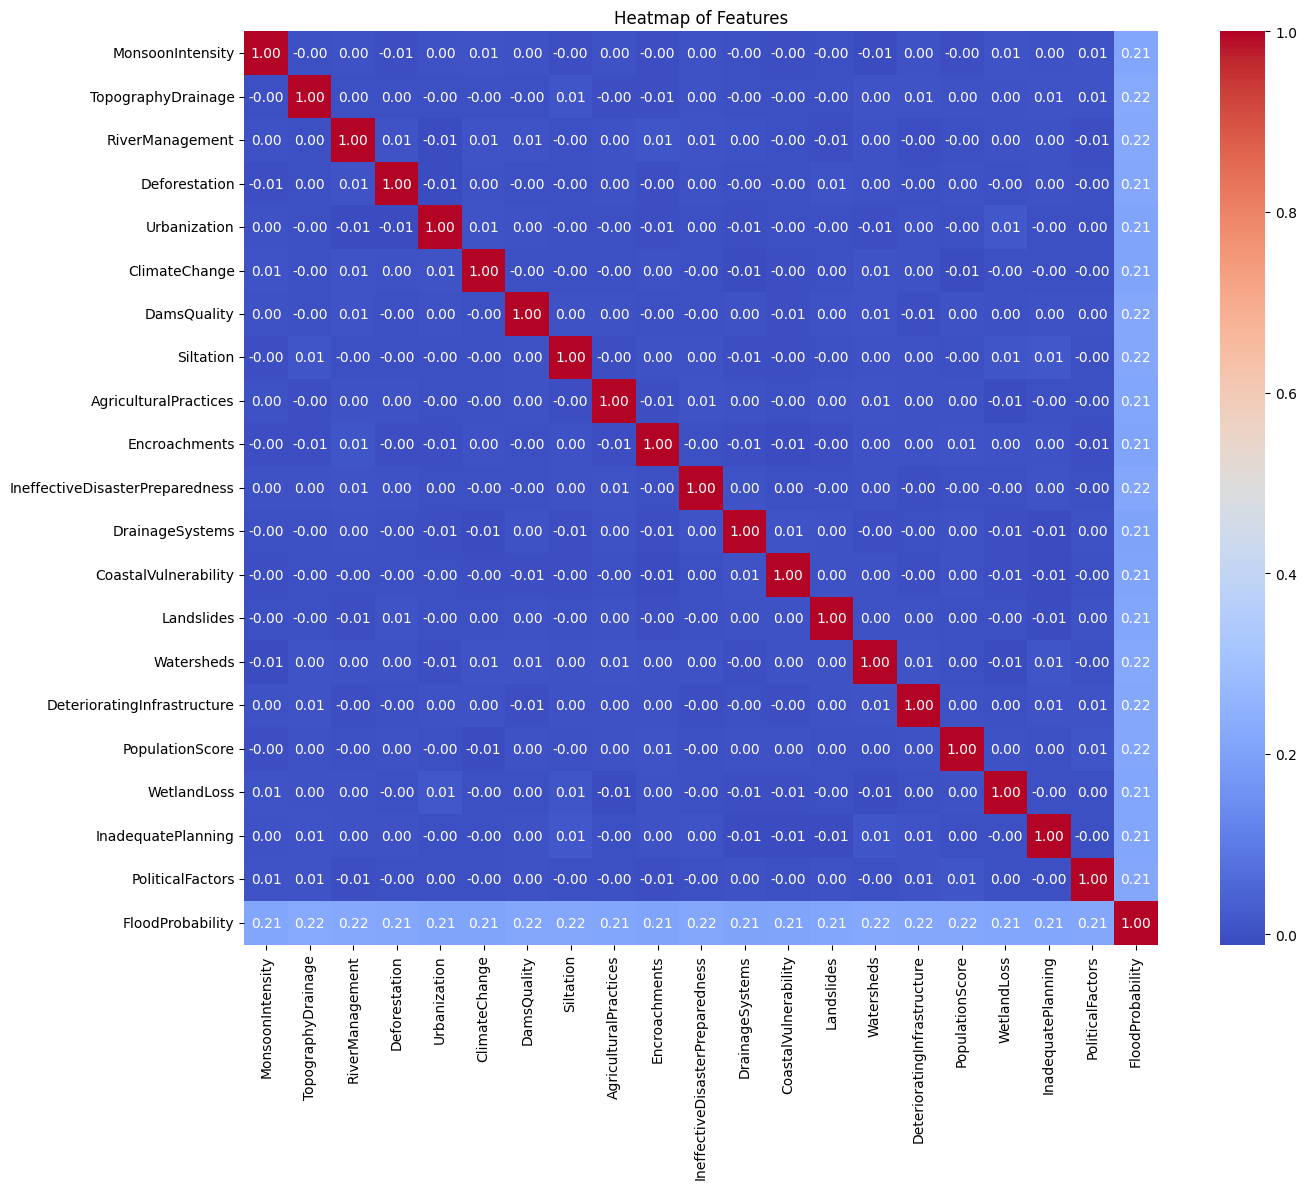

In [ ]:
# check correlation
spearman_corr = df.corr(method='spearman')
plt.figure(figsize=(15, 12))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Heatmap of Features")
plt.tight_layout()
plt.show()

Text(0.5, 0.98, 'Feature Distributions')

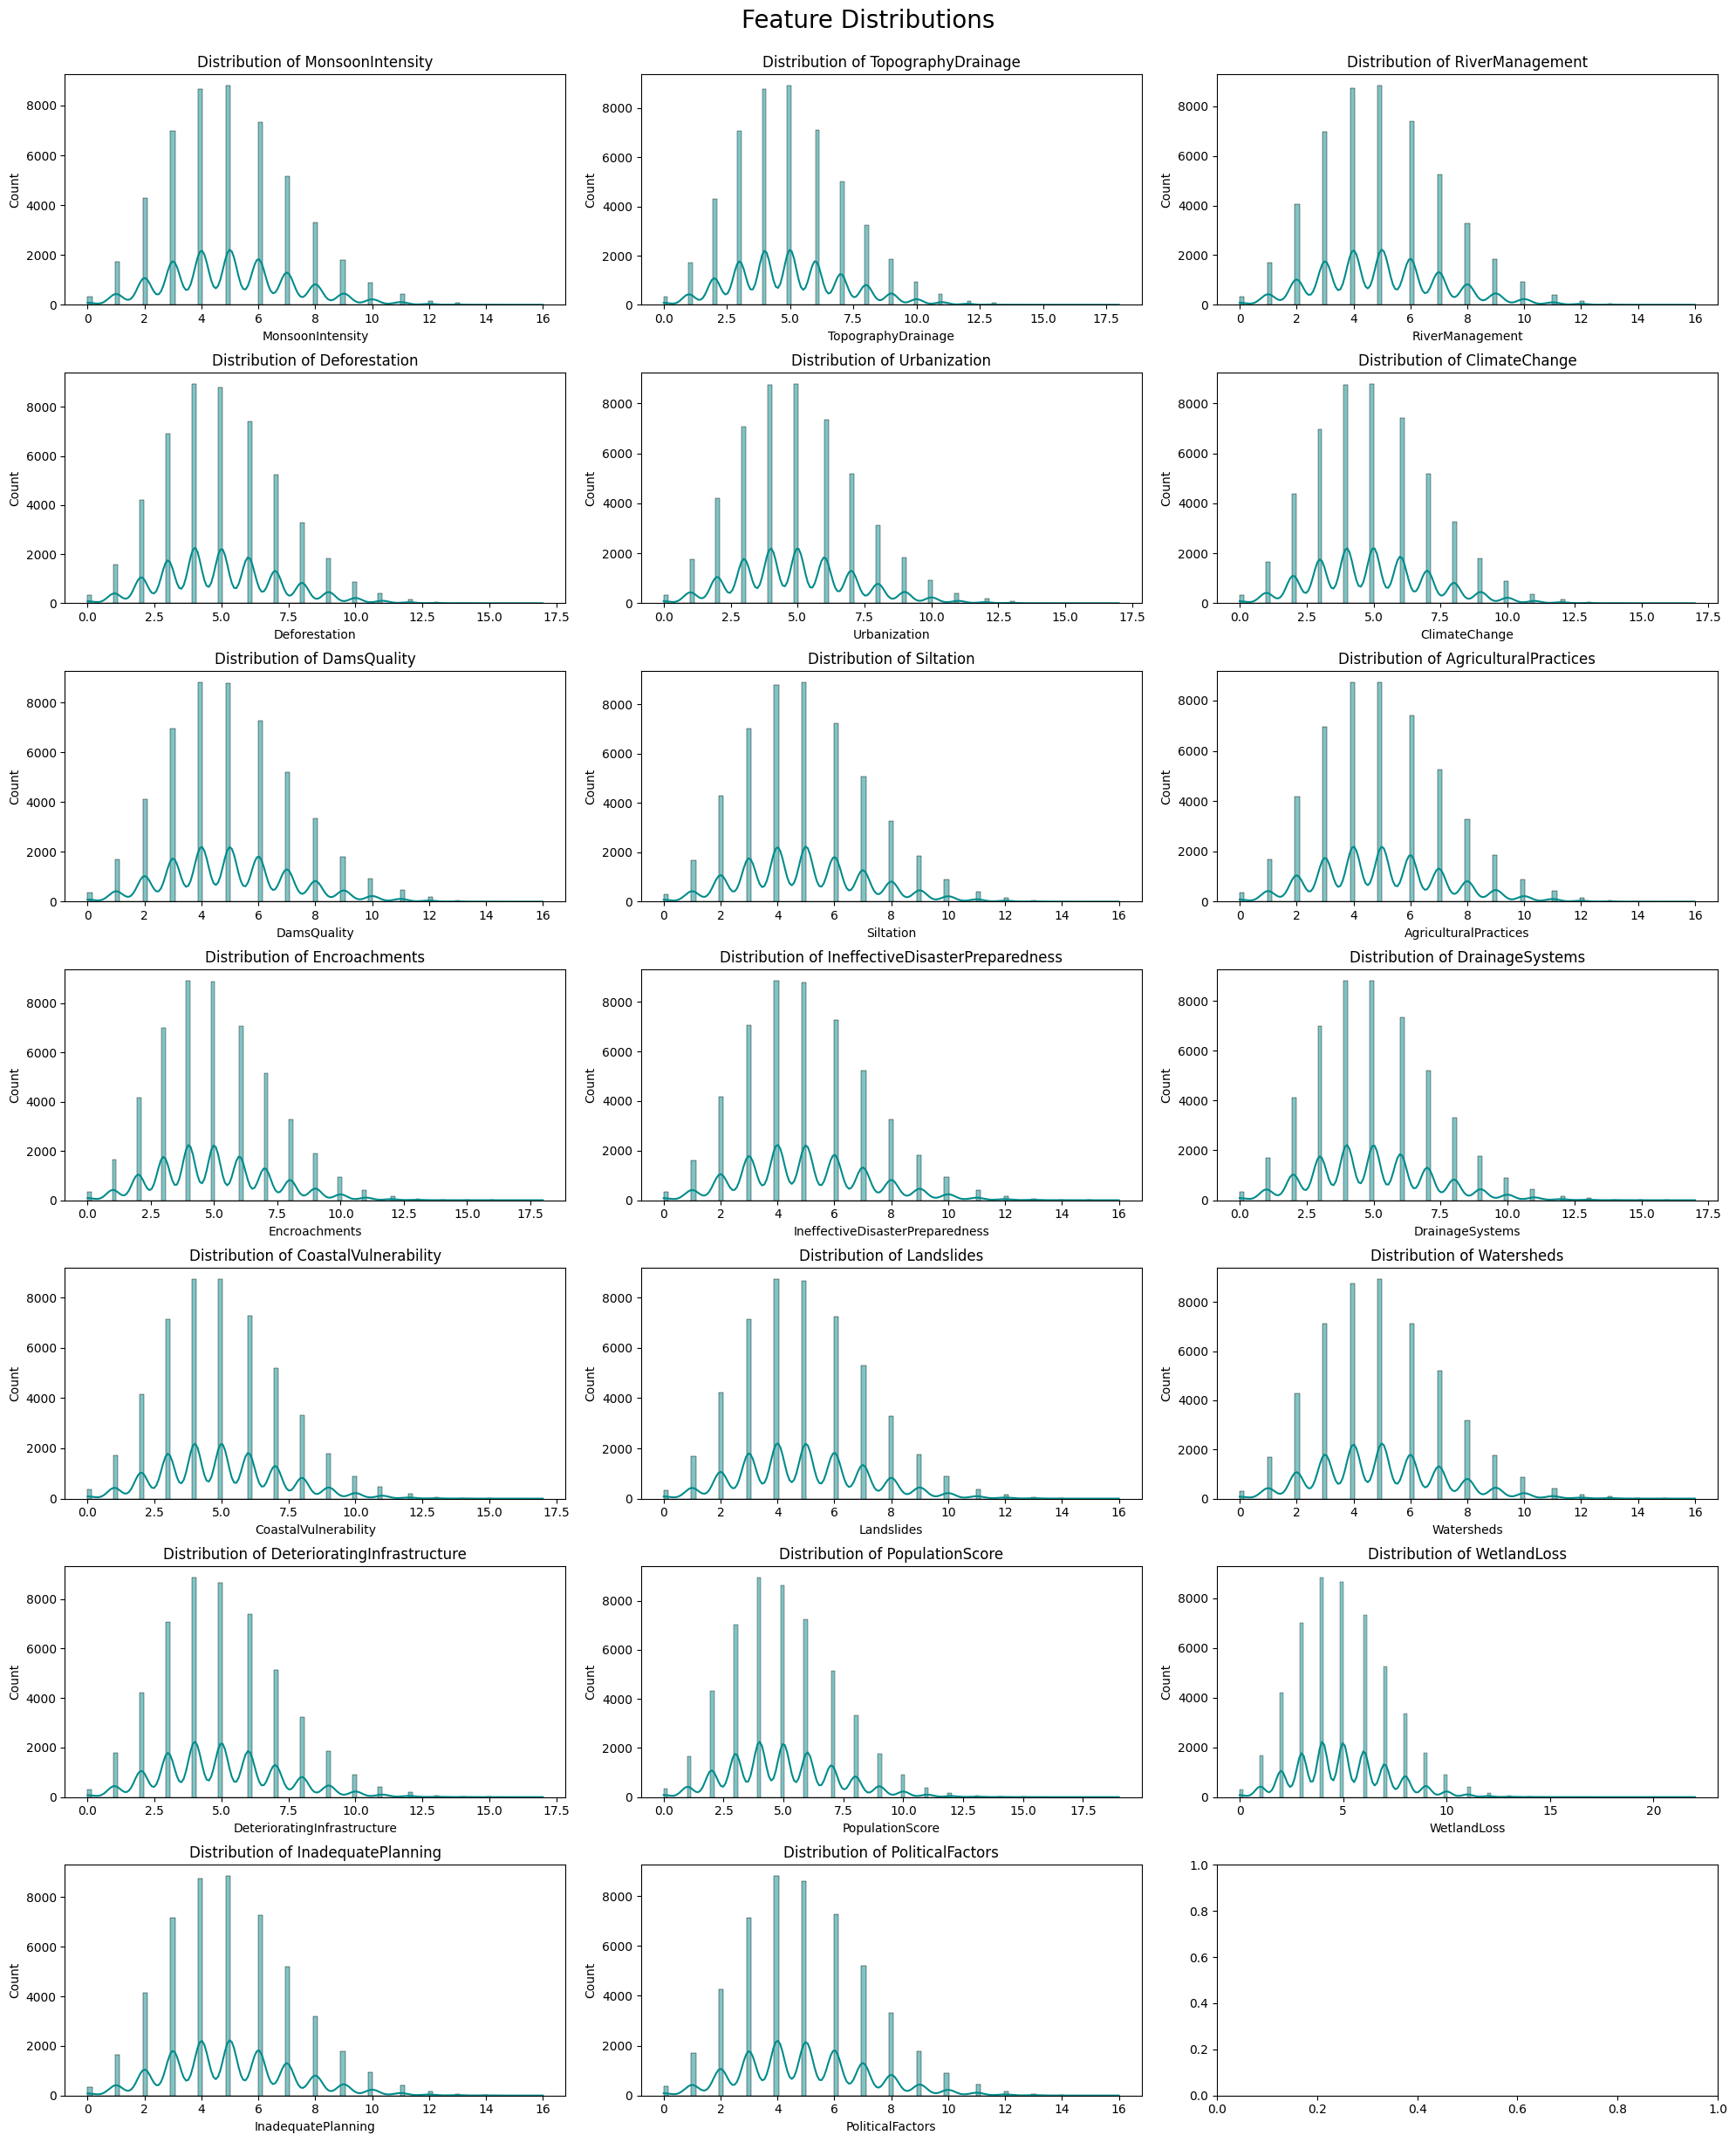

In [ ]:
# feature distribution
fig, axs = plt.subplots(nrows=7, ncols=3, figsize=(20, 25))
axs = axs.ravel()

for i, col in enumerate(df.columns[:-1]):
    sns.histplot(df[col], kde=True, ax=axs[i], color='DarkCyan')
    axs[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
fig.suptitle("Feature Distributions", fontsize=20)

Highest correlation:
TopographyDrainage                 0.222213
Watersheds                         0.220344
RiverManagement                    0.218282
DeterioratingInfrastructure        0.217295
IneffectiveDisasterPreparedness    0.216766
PopulationScore                    0.216566
DamsQuality                        0.216437
Siltation                          0.216251
PoliticalFactors                   0.214410
Deforestation                      0.213954
InadequatePlanning                 0.213484
AgriculturalPractices              0.212878
MonsoonIntensity                   0.212016
WetlandLoss                        0.211448
Landslides                         0.211312
ClimateChange                      0.209701
Urbanization                       0.207997
CoastalVulnerability               0.207764
Encroachments                      0.207604
DrainageSystems                    0.205360
Name: FloodProbability, dtype: float64


<ipython-input-9-7456bc3ed696>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_sorted[:10].values, y=correlation_sorted[:10].index, palette="coolwarm")


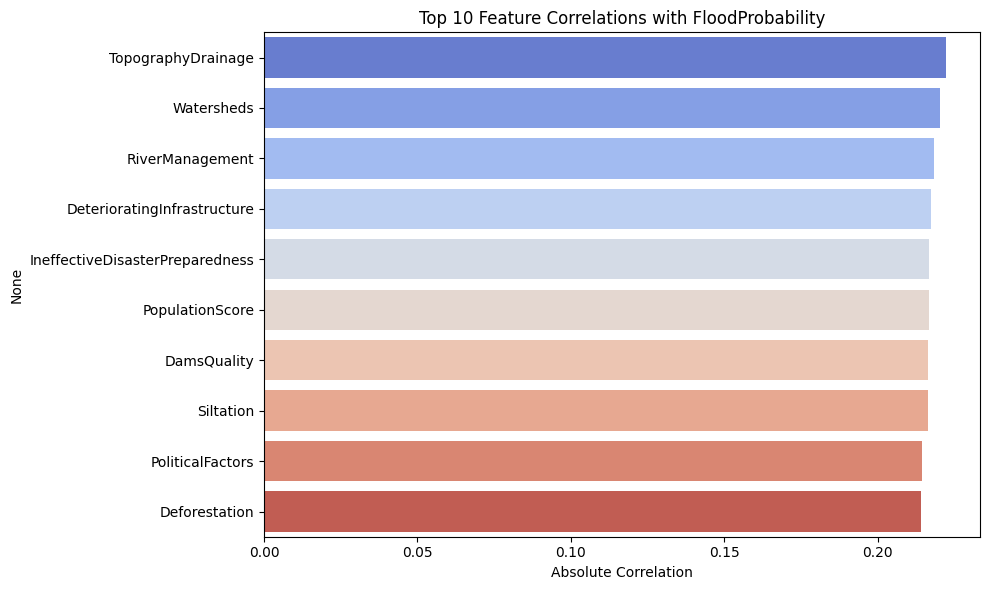

In [ ]:
# most important feature
correlation = df.corr(method='spearman')['FloodProbability'].drop('FloodProbability')
correlation_sorted = correlation.abs().sort_values(ascending=False)
top_corr_features = correlation_sorted.head(10).index.tolist()

print("Highest correlation:")
print(correlation_sorted)

plt.figure(figsize=(10,6))
sns.barplot(x=correlation_sorted[:10].values, y=correlation_sorted[:10].index, palette="coolwarm")

plt.title('Top 10 Feature Correlations with FloodProbability')
plt.xlabel('Absolute Correlation')
plt.tight_layout()
plt.show()

Text(0.5, 0.98, 'Boxplot for Outlier Analysis')

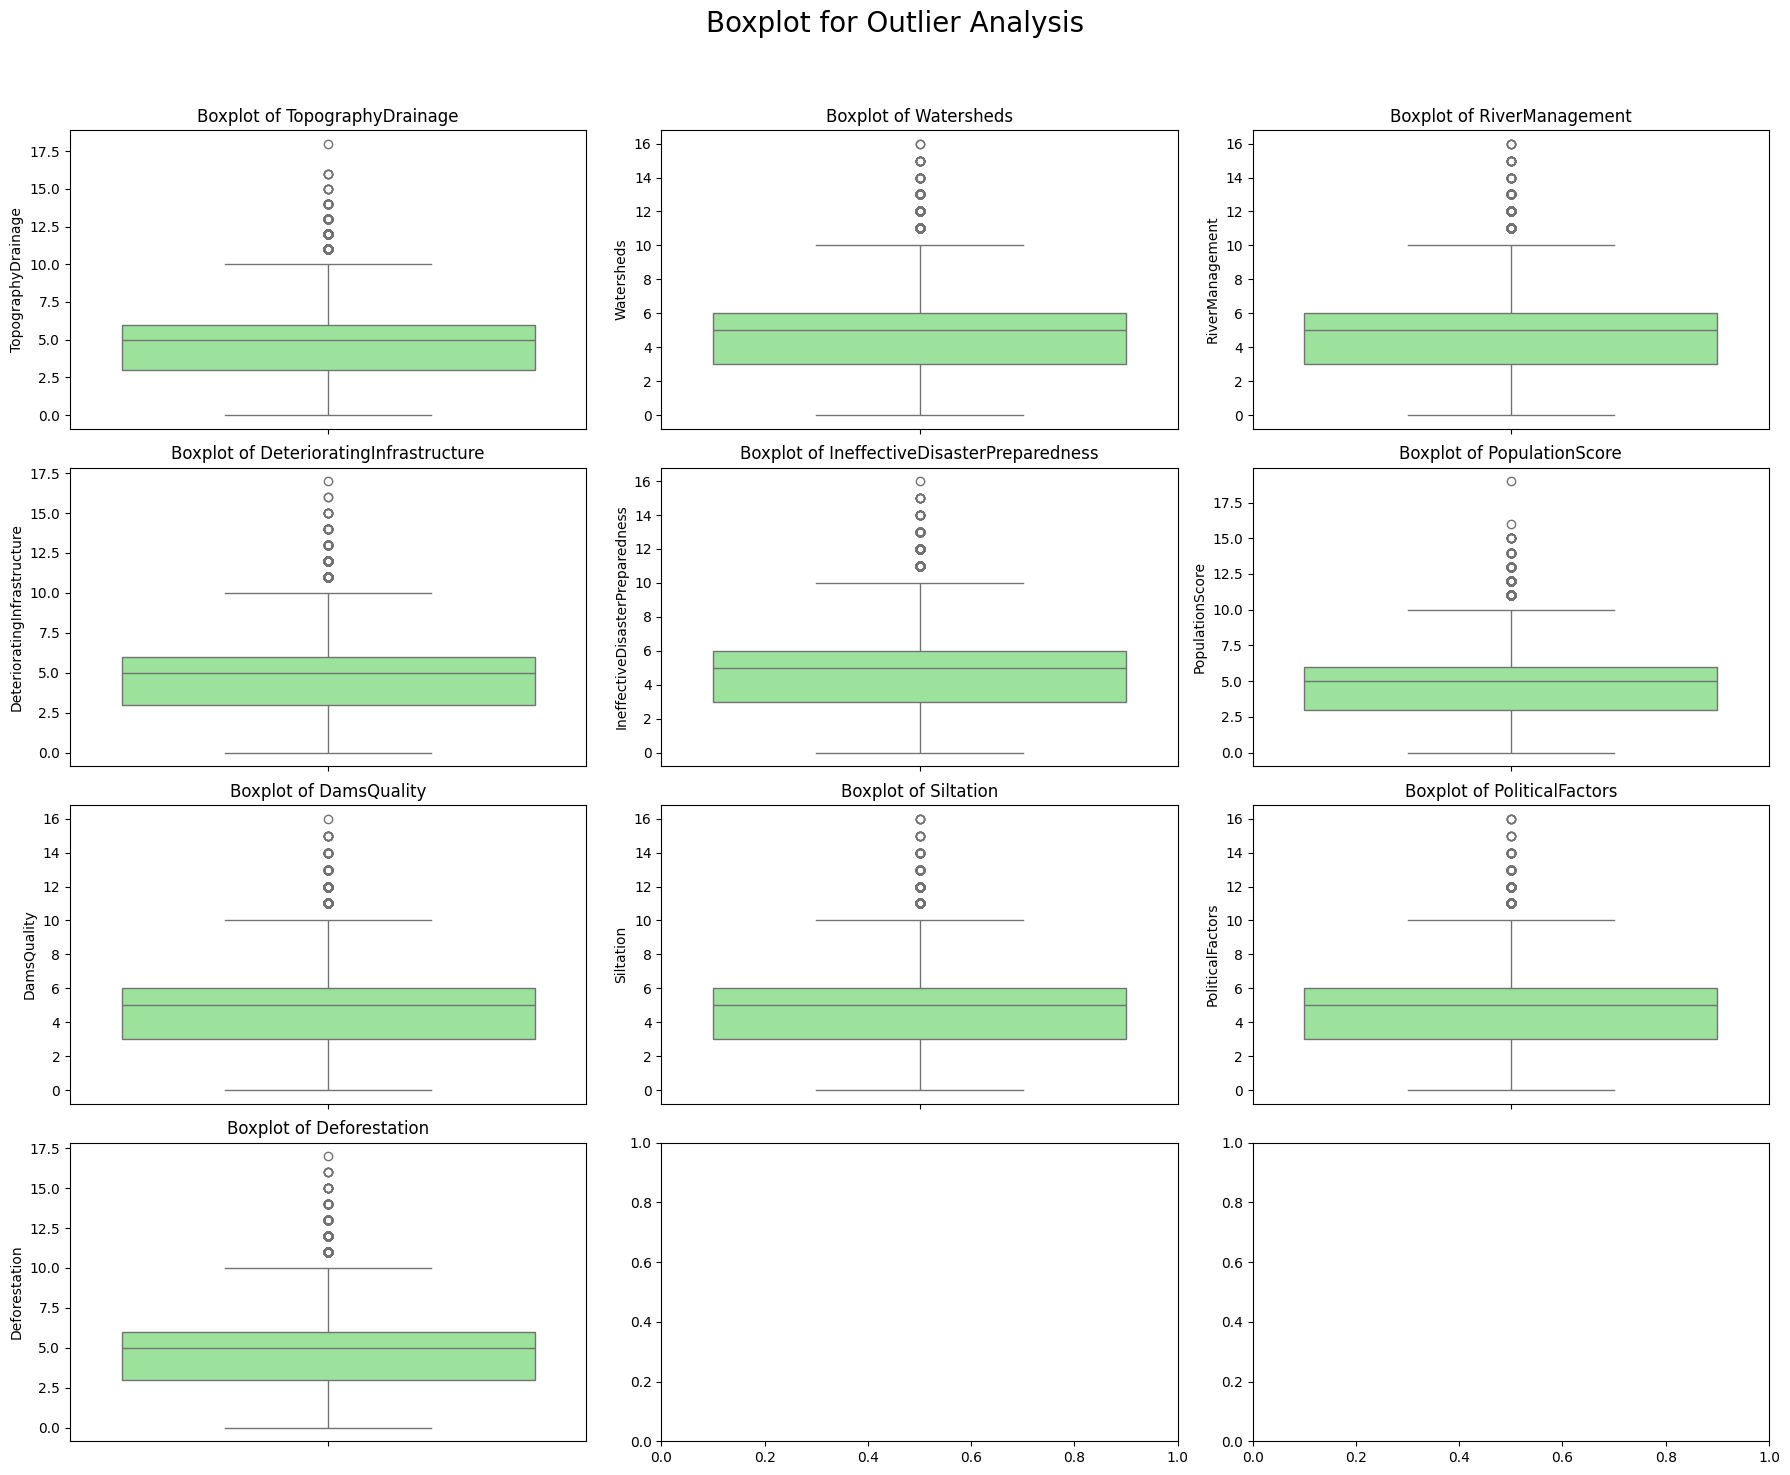

In [ ]:
# outlier analysis
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(18, 15))
axs = axs.ravel()

for i, col in enumerate(top_corr_features):
    sns.boxplot(y=df[col], ax=axs[i], color='lightgreen')
    axs[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle("Boxplot for Outlier Analysis", fontsize=20)

#Normalisasi dan Pembagian Data

In [ ]:
# Load dataset
df = pd.read_csv('/content/flood.csv')

# Fitur dan target
X = df.drop('FloodProbability', axis=1)
y = df['FloodProbability'].values.reshape(-1, 1)

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Modelling Scratch (Neural Network)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # regresi
])

model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100, batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0699 - mae: 0.1814 - val_loss: 0.0051 - val_mae: 0.0598
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0035 - mae: 0.0462 - val_loss: 0.0020 - val_mae: 0.0387
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0012 - mae: 0.0274 - val_loss: 3.7040e-04 - val_mae: 0.0155
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6.3285e-04 - mae: 0.0197 - val_loss: 1.5083e-04 - val_mae: 0.0099
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 4.3634e-04 - mae: 0.0163 - val_loss: 2.5850e-04 - val_mae: 0.0141
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3.1454e-04 - mae: 0.0139 - val_loss: 5.3627e-05 - val_mae: 0.0059
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.6115e-04 - mae: 0.0127 - val_loss: 1.9376e-04 - val_mae: 0.0127
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 2.3651e-04 - mae: 0.0120 - val_loss: 1.7566e-04 - val_

#Specialized Architecture (TabNet)

In [ ]:
# Konversi ke float32 (requirement dari TabNet)
X_train_tab, X_test_tab = X_train.astype(np.float32), X_test.astype(np.float32)
y_train_tab, y_test_tab = y_train.astype(np.float32), y_test.astype(np.float32)

tabnet = TabNetRegressor(verbose=0)
tabnet.fit(X_train_tab, y_train_tab, eval_set=[(X_test_tab, y_test_tab)],
           eval_metric=['rmse'], max_epochs=200, patience=20, batch_size=1024)

# Prediksi
y_pred_tabnet = tabnet.predict(X_test_tab).flatten()


Early stopping occurred at epoch 128 with best_epoch = 108 and best_val_0_rmse = 0.00583


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


#Evaluasi Model

In [ ]:
# === 1. PREDIKSI ===
y_pred_nn = model.predict(X_test).flatten()  # model adalah NN kamu
y_pred_tabnet = tabnet.predict(X_test_tab).flatten()  # TabNet prediksi

# === 2. FLATTEN TARGET ===
y_test_flat = np.array(y_test).ravel()

# === 3. ERROR ===
error_nn = y_test_flat - y_pred_nn
error_tabnet = y_test_flat - y_pred_tabnet

# === 4. EVALUASI FUNGSI ===
def evaluate(y_true, y_pred, label):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{label} Model:")
    print(f"  MAE : {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R²  : {r2:.4f}")
    print("-" * 30)
    return mae, rmse, r2

# === 5. EVALUASI ===
evaluate(y_test_flat, y_pred_nn, "Neural Network")
evaluate(y_test_flat, y_pred_tabnet, "TabNet")

import pandas as pd

# === 6. TAMPILKAN SAMPLE HASIL PREDIKSI ===
results_df = pd.DataFrame({
    'y_actual': y_test_flat,
    'y_pred_nn': y_pred_nn,
    'y_pred_tabnet': y_pred_tabnet,
    'error_nn': error_nn,
    'error_tabnet': error_tabnet
})

# Tampilkan 10 sampel pertama
print("\n📊 Contoh Prediksi vs Aktual:")
print(results_df.head(10))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Neural Network Model:
  MAE : 0.0019
  RMSE: 0.0025
  R²  : 0.9975
------------------------------
TabNet Model:
  MAE : 0.0038
  RMSE: 0.0058
  R²  : 0.9863
------------------------------

📊 Contoh Prediksi vs Aktual:
   y_actual  y_pred_nn  y_pred_tabnet  error_nn  error_tabnet
0     0.455   0.453772       0.456351  0.001228     -0.001351
1     0.495   0.488208       0.499606  0.006792     -0.004606
2     0.470   0.471105       0.470665 -0.001105     -0.000665
3     0.460   0.458546       0.462187  0.001454     -0.002187
4     0.465   0.464227       0.469150  0.000773     -0.004150
5     0.535   0.537016       0.530323 -0.002016      0.004677
6     0.490   0.490794       0.490121 -0.000794     -0.000121
7     0.480   0.479604       0.478532  0.000396      0.001468
8     0.605   0.605132       0.631179 -0.000132     -0.026179
9     0.490   0.491603       0.495623 -0.001603     -0.005623


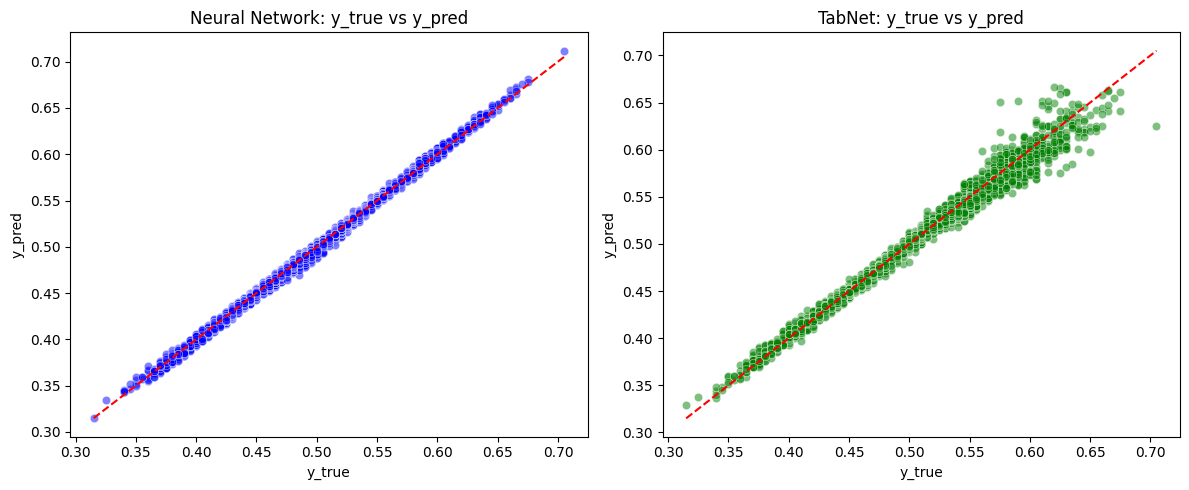

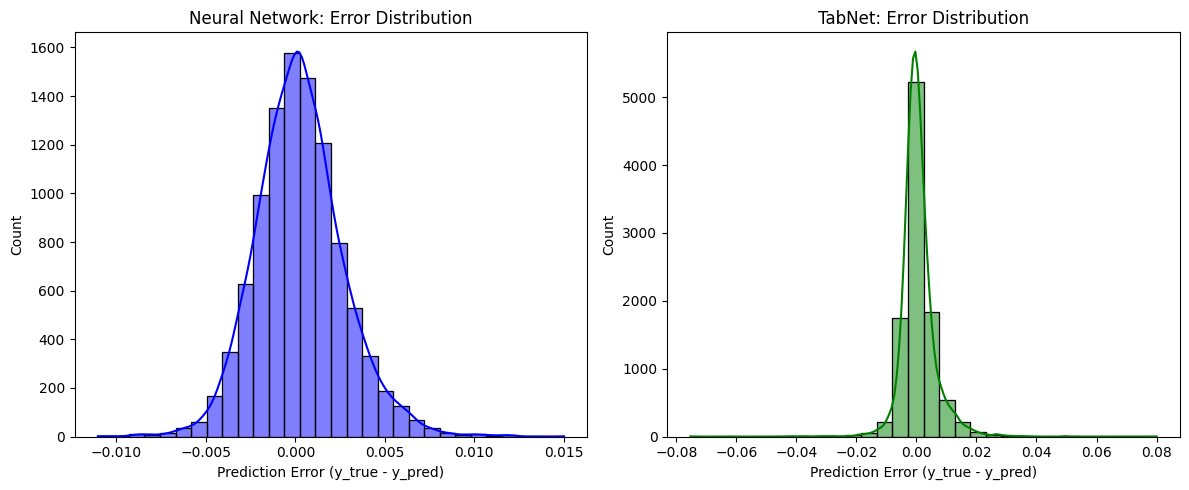

In [ ]:
# === 6. SCATTER PLOT ===
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test_flat, y=y_pred_nn, alpha=0.5, color='blue')
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], 'r--')
plt.title('Neural Network: y_true vs y_pred')
plt.xlabel('y_true')
plt.ylabel('y_pred')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_flat, y=y_pred_tabnet, alpha=0.5, color='green')
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], 'r--')
plt.title('TabNet: y_true vs y_pred')
plt.xlabel('y_true')
plt.ylabel('y_pred')

plt.tight_layout()
plt.show()


# === 7. HISTOGRAM DISTRIBUSI ERROR ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(error_nn, bins=30, kde=True, color='blue')
plt.title('Neural Network: Error Distribution')
plt.xlabel('Prediction Error (y_true - y_pred)')

plt.subplot(1, 2, 2)
sns.histplot(error_tabnet, bins=30, kde=True, color='green')
plt.title('TabNet: Error Distribution')
plt.xlabel('Prediction Error (y_true - y_pred)')

plt.tight_layout()
plt.show()

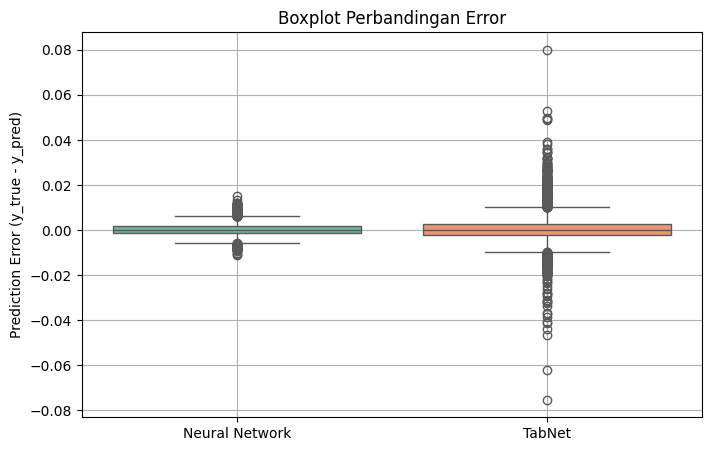

In [ ]:

# === 8. BOXPLOT ERROR COMPARISON ===
plt.figure(figsize=(8, 5))
sns.boxplot(data=[error_nn, error_tabnet], palette="Set2")
plt.xticks([0, 1], ['Neural Network', 'TabNet'])
plt.ylabel('Prediction Error (y_true - y_pred)')
plt.title('Boxplot Perbandingan Error')
plt.grid(True)
plt.show()


#Hyperparameter Tuning

In [ ]:
# 1. Install dan Import Library
!pip install -q keras-tuner scikit-learn

import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# 2. Fungsi build_model untuk tuning hyperparameter
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(hp.Int('units_1', 64, 256, step=32), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))
    model.add(Dense(hp.Int('units_2', 32, 128, step=32), activation='relu'))
    model.add(Dense(hp.Int('units_3', 16, 64, step=16), activation='relu'))
    model.add(Dense(1))  # Output layer

    model.compile(
        loss='mse',
        optimizer=Adam(learning_rate=hp.Choice('lr', [1e-2, 1e-3, 5e-4])),
        metrics=['mae']
    )
    return model

# 3. Inisialisasi Keras Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='tuning_nn',
    project_name='regression_nn'
)

# 4. Callback Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 5. Jalankan proses tuning
tuner.search(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# 6. Ambil model terbaik dari hasil tuning
best_nn_model = tuner.get_best_models(1)[0]

# 7. Training ulang model terbaik
best_nn_history = best_nn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=0
)

# 8. Evaluasi performa model
nn_preds = best_nn_model.predict(X_test).flatten()
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_preds))
nn_mae = mean_absolute_error(y_test, nn_preds)

print(f"[Neural Net] RMSE: {nn_rmse:.4f} | MAE: {nn_mae:.4f}")

Trial 10 Complete [00h 05m 44s]
val_loss: 5.908868388360133e-06

Best val_loss So Far: 3.999149612354813e-06
Total elapsed time: 00h 37m 23s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[Neural Net] RMSE: 0.0018 | MAE: 0.0014


In [ ]:
best_hp = tuner.get_best_hyperparameters(1)[0]

print("\nBest Hyperparameters:")
print(f"Units_1      : {best_hp.get('units_1')}")
print(f"Dropout      : {best_hp.get('dropout')}")
print(f"Units_2      : {best_hp.get('units_2')}")
print(f"Units_3      : {best_hp.get('units_3')}")
print(f"Learning Rate: {best_hp.get('lr')}")

best_nn_model.save("best_nn_model.h5")
print("✅ Model terbaik disimpan sebagai 'best_nn_model.h5'")


Best Hyperparameters:
Units_1      : 128
Dropout      : 0.1
Units_2      : 32
Units_3      : 32
Learning Rate: 0.001
✅ Model terbaik disimpan sebagai 'best_nn_model.h5'


In [ ]:
!pip install pytorch-tabnet --quiet

from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import torch

# 1. Grid disederhanakan
params_grid = {
    'n_d': [8],
    'n_a': [8],
    'n_steps': [3, 5],        # lebih kecil dari 10
    'gamma': [1.0],
    'lambda_sparse': [1e-3]
}

best_rmse = float('inf')
best_model = None
best_params = None

# 2. Loop lebih ringan
for n_steps in params_grid['n_steps']:
    model = TabNetRegressor(
        n_d=8,
        n_a=8,
        n_steps=n_steps,
        gamma=1.0,
        lambda_sparse=1e-3,
        seed=42,
        verbose=0
    )

    model.fit(
        X_train, y_train.reshape(-1, 1),
        eval_set=[(X_test, y_test.reshape(-1, 1))],
        eval_metric=['rmse'],
        max_epochs=50,           # dikurangi dari 100
        patience=5,              # supaya cepat stop
        batch_size=512,
        virtual_batch_size=128
    )

    preds = model.predict(X_test).flatten()
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    if rmse < best_rmse:
        best_rmse = rmse
        best_model = model
        best_params = {
            'n_d': 8, 'n_a': 8, 'n_steps': n_steps,
            'gamma': 1.0, 'lambda_sparse': 1e-3
        }

# 3. Evaluasi akhir
final_preds = best_model.predict(X_test).flatten()
final_rmse = np.sqrt(mean_squared_error(y_test, final_preds))
final_mae = mean_absolute_error(y_test, final_preds)

print(f"[TabNet] RMSE: {final_rmse:.4f} | MAE: {final_mae:.4f}")
print(f"[TabNet] Best Params: {best_params}")


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.00879


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 47 and best_val_0_rmse = 0.01343


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


[TabNet] RMSE: 0.0088 | MAE: 0.0065
[TabNet] Best Params: {'n_d': 8, 'n_a': 8, 'n_steps': 3, 'gamma': 1.0, 'lambda_sparse': 0.001}


#Evaluasi Model Tuning

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

=== Perbandingan Model Setelah Tuning ===
Neural Net After Tuning:  RMSE = 0.0018, MAE = 0.0014, R² = 0.9987
TabNet After Tuning:      RMSE = 0.0088, MAE = 0.0065, R² = 0.9690


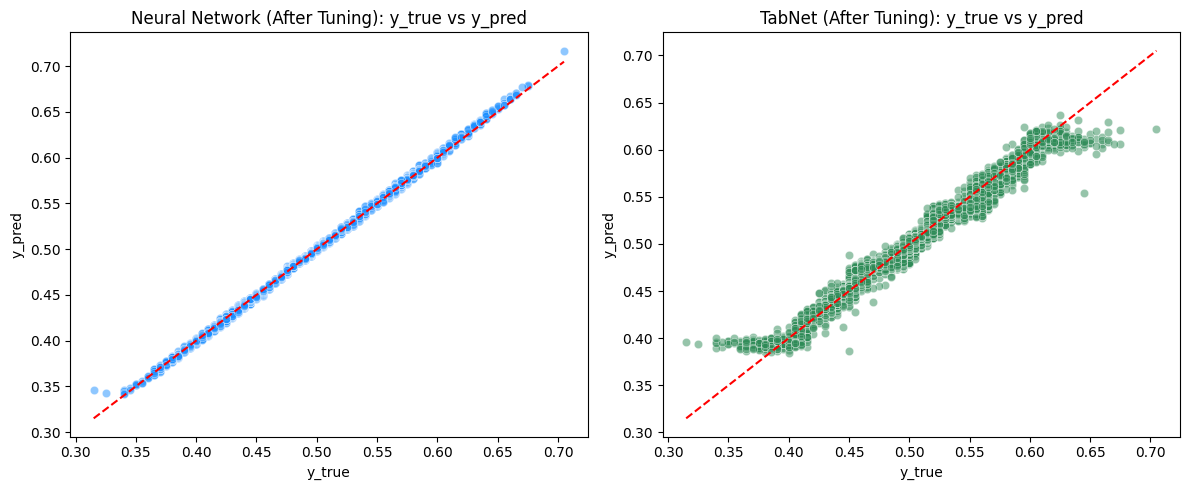

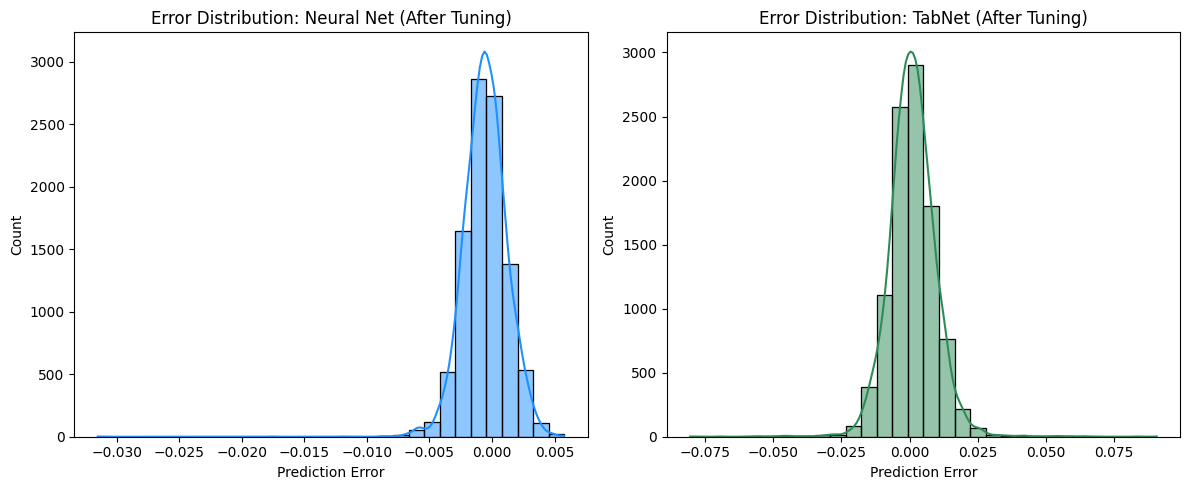

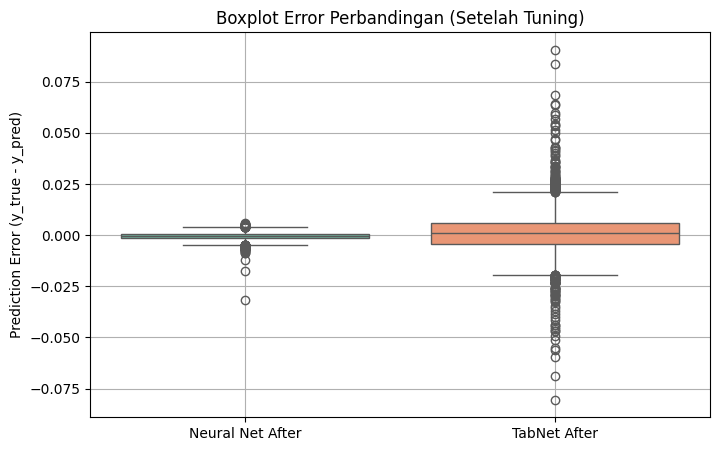

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === 1. Mapping nama variabel model supaya konsisten
model_nn_after = best_nn_model           # sudah ada
model_tabnet_after = best_model          # hasil tuning TabNet yang benar

# === 2. Prediksi
# Neural Network After Tuning
y_pred_nn_after = model_nn_after.predict(X_test).flatten()

# TabNet After Tuning
y_pred_tabnet_after = model_tabnet_after.predict(X_test).flatten()

# === 3. Hitung Error
error_nn_after = y_test.ravel() - y_pred_nn_after
error_tabnet_after = y_test.ravel() - y_pred_tabnet_after

# === 4. Hitung Metrik Evaluasi
nn_rmse = np.sqrt(mean_squared_error(y_test, y_pred_nn_after))
nn_mae = mean_absolute_error(y_test, y_pred_nn_after)
nn_r2 = r2_score(y_test, y_pred_nn_after)

tabnet_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tabnet_after))
tabnet_mae = mean_absolute_error(y_test, y_pred_tabnet_after)
tabnet_r2 = r2_score(y_test, y_pred_tabnet_after)

# === 5. Tampilkan hasil evaluasi
print("\n=== Perbandingan Model Setelah Tuning ===")
print(f"Neural Net After Tuning:  RMSE = {nn_rmse:.4f}, MAE = {nn_mae:.4f}, R² = {nn_r2:.4f}")
print(f"TabNet After Tuning:      RMSE = {tabnet_rmse:.4f}, MAE = {tabnet_mae:.4f}, R² = {tabnet_r2:.4f}")

# === 6. Visualisasi Scatter Plot (y_true vs y_pred)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x=y_test.ravel(), y=y_pred_nn_after, alpha=0.5, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Neural Network (After Tuning): y_true vs y_pred')
plt.xlabel('y_true')
plt.ylabel('y_pred')

plt.subplot(1,2,2)
sns.scatterplot(x=y_test.ravel(), y=y_pred_tabnet_after, alpha=0.5, color='seagreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('TabNet (After Tuning): y_true vs y_pred')
plt.xlabel('y_true')
plt.ylabel('y_pred')

plt.tight_layout()
plt.show()

# === 7. Visualisasi Distribusi Error (histogram + KDE)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(error_nn_after, bins=30, kde=True, color='dodgerblue')
plt.title('Error Distribution: Neural Net (After Tuning)')
plt.xlabel('Prediction Error')

plt.subplot(1,2,2)
sns.histplot(error_tabnet_after, bins=30, kde=True, color='seagreen')
plt.title('Error Distribution: TabNet (After Tuning)')
plt.xlabel('Prediction Error')

plt.tight_layout()
plt.show()

# === 8. Visualisasi Boxplot Error
plt.figure(figsize=(8,5))
sns.boxplot(data=[error_nn_after, error_tabnet_after], palette='Set2')
plt.xticks([0,1], ['Neural Net After', 'TabNet After'])
plt.ylabel('Prediction Error (y_true - y_pred)')
plt.title('Boxplot Error Perbandingan (Setelah Tuning)')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data performa model (diperbarui sesuai hasil PDF & screenshot)
data = {
    'Model': [
        'Neural Net (Before Tuning)',
        'Neural Net (After Tuning)',
        'TabNet (Before Tuning)',
        'TabNet (After Tuning)'
    ],
    'RMSE': [0.0023, 0.0018, 0.0058, 0.0088],
    'MAE': [0.0018, 0.0014, 0.0038, 0.0065],
    'R2':   [0.9978, 0.9987, 0.9863, 0.9690]
}

df_models = pd.DataFrame(data)

# Format agar lebih rapi saat ditampilkan
pd.set_option('display.float_format', '{:.4f}'.format)

# Tampilkan tabel performa
print("=== Tabel Performa Model ===")
print(df_models.to_string(index=False))


=== Tabel Performa Model ===
                     Model   RMSE    MAE     R2
Neural Net (Before Tuning) 0.0023 0.0018 0.9978
 Neural Net (After Tuning) 0.0018 0.0014 0.9987
    TabNet (Before Tuning) 0.0058 0.0038 0.9863
     TabNet (After Tuning) 0.0088 0.0065 0.9690


<ipython-input-29-cc240c8959d8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_models, x='Model', y='RMSE', palette='viridis')
<ipython-input-29-cc240c8959d8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_models, x='Model', y='MAE', palette='mako')
<ipython-input-29-cc240c8959d8>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_models, x='Model', y='R2', palette='flare')


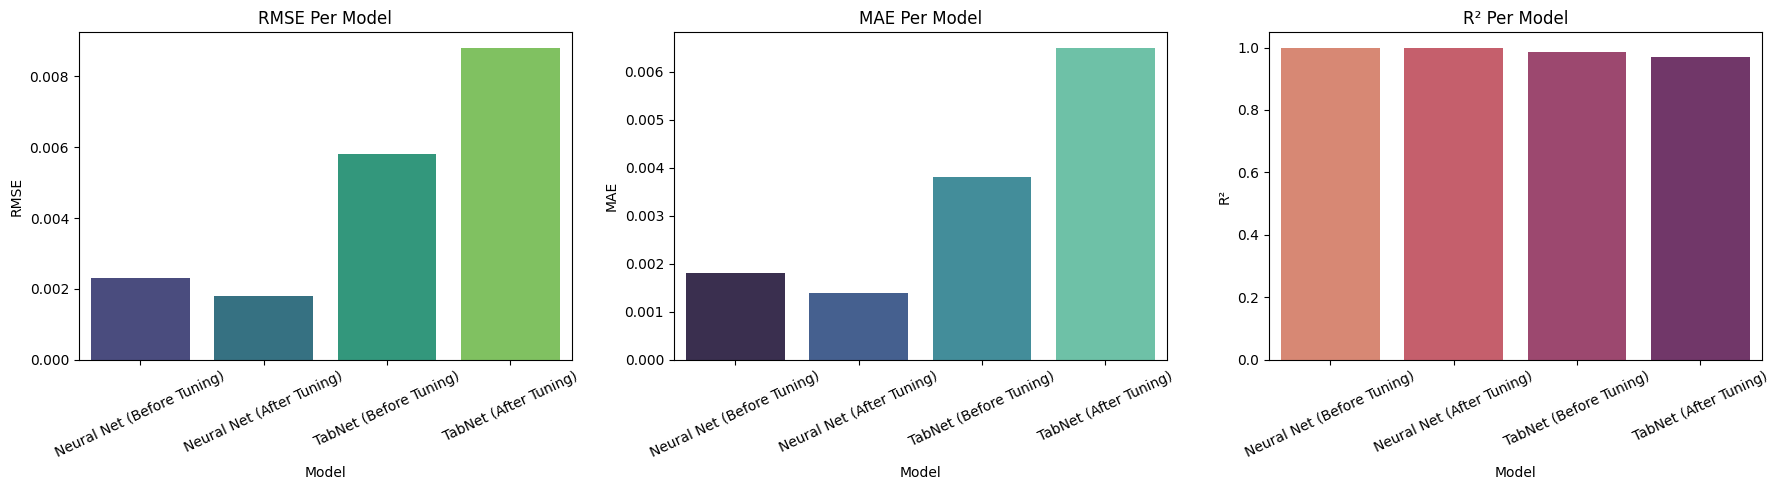

In [ ]:
# === Visualisasi
plt.figure(figsize=(18, 5))

# RMSE
plt.subplot(1, 3, 1)
sns.barplot(data=df_models, x='Model', y='RMSE', palette='viridis')
plt.title('RMSE Per Model')
plt.xticks(rotation=25)
plt.ylabel('RMSE')

# MAE
plt.subplot(1, 3, 2)
sns.barplot(data=df_models, x='Model', y='MAE', palette='mako')
plt.title('MAE Per Model')
plt.xticks(rotation=25)

# R2
plt.subplot(1, 3, 3)
sns.barplot(data=df_models, x='Model', y='R2', palette='flare')
plt.title('R² Per Model')
plt.xticks(rotation=25)
plt.ylabel('R²')

plt.tight_layout()
plt.show()